# Analyzing a real world data-set with SQL and Python

## Selected Socioeconomic Indicators in Chicago

The city of Chicago released a dataset of socioeconomic data to the Chicago City Portal.
This dataset contains a selection of six socioeconomic indicators of public health significance and a “hardship index,” for each Chicago community area, for the years 2008 – 2012.

Scores on the hardship index can range from 1 to 100, with a higher index number representing a greater level of hardship.

A detailed description of the dataset can be found on [the city of Chicago's website](https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDB0201ENSkillsNetwork20127838-2021-01-01), but to summarize, the dataset has the following variables:

*   **Community Area Number** (`ca`): Used to uniquely identify each row of the dataset

*   **Community Area Name** (`community_area_name`): The name of the region in the city of Chicago

*   **Percent of Housing Crowded** (`percent_of_housing_crowded`): Percent of occupied housing units with more than one person per room

*   **Percent Households Below Poverty** (`percent_households_below_poverty`): Percent of households living below the federal poverty line

*   **Percent Aged 16+ Unemployed** (`percent_aged_16_unemployed`): Percent of persons over the age of 16 years that are unemployed

*   **Percent Aged 25+ without High School Diploma** (`percent_aged_25_without_high_school_diploma`): Percent of persons over the age of 25 years without a high school education

*   **Percent Aged Under** 18 or Over 64:Percent of population under 18 or over 64 years of age (`percent_aged_under_18_or_over_64`): (ie. dependents)

*   **Per Capita Income** (`per_capita_income_`): Community Area per capita income is estimated as the sum of tract-level aggragate incomes divided by the total population

*   **Hardship Index** (`hardship_index`): Score that incorporates each of the six selected socioeconomic indicators

In this Lab, we'll take a look at the variables in the socioeconomic indicators dataset and do some basic analysis with Python.


In [29]:
!pip install ipython-sql
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [30]:
import csv, sqlite3

con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()
!pip install pandas 

In [31]:
%sql sqlite:///socioeconomic.db

In [32]:
import pandas
df = pandas.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")


78

In [33]:
# Install the 'ipython-sql' and 'prettytable' libraries using pip
!pip install ipython-sql prettytable

# Import the 'prettytable' library, which is used to display data in a formatted table
import prettytable

# Set the default display format for prettytable to 'DEFAULT' (i.e., a simple table format)
prettytable.DEFAULT = 'DEFAULT'

In [34]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


## Problems

### Problem 1

##### How many rows are in the dataset?

In [35]:
df.shape

(78, 9)

In [36]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


### Problem 2

##### How many community areas in Chicago have a hardship index greater than 50.0?

In [51]:
x=df[df['hardship_index']>50]
x.shape[0]

38

In [52]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index>50;

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
38


### Problem 3

##### What is the maximum value of hardship index in this dataset?

In [54]:
df['hardship_index'].max()

np.float64(98.0)

In [58]:
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data;

 * sqlite:///socioeconomic.db
Done.


MAX(hardship_index)
98.0


### Problem 4

##### Which community area which has the highest hardship index?


In [83]:
df[['community_area_name','hardship_index']].max()

community_area_name    Woodlawn
hardship_index             98.0
dtype: object

In [86]:
%sql SELECT community_area_name, MAX(hardship_index) FROM chicago_socioeconomic_data

 * sqlite:///socioeconomic.db
Done.


community_area_name,MAX(hardship_index)
Riverdale,98.0


### Problem 5

##### Which Chicago community areas have per-capita incomes greater than $60,000?


In [98]:
incomemorethan60000=df[df['per_capita_income_']>60000]
incomemorethan60000['community_area_name']

5           Lake View
6        Lincoln Park
7     Near North Side
31               Loop
Name: community_area_name, dtype: object

In [96]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE per_capita_income_ > 60000

 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


### Problem 6

##### Create a scatter plot using the variables `per_capita_income_` and `hardship_index`. Explain the correlation between the two variables.


In [101]:
import matplotlib.pyplot as plt

Correct answer:You can see that as Per Capita Income rises as the Hardship Index decreases. We see that the points on the scatter plot are somewhat closer to a straight line in the negative direction, so we have a negative correlation between the two variables. 


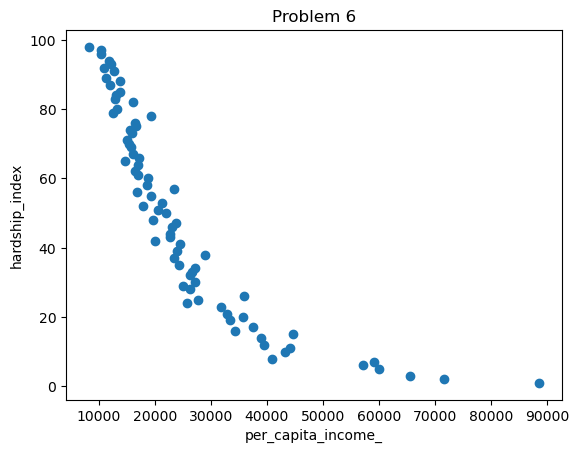

In [106]:
plt.scatter(df['per_capita_income_'], df['hardship_index'])
plt.title('Problem 6')
plt.xlabel('per_capita_income_')
plt.ylabel('hardship_index')
print('Correct answer:You can see that as Per Capita Income rises as the Hardship Index decreases. We see that the points on the scatter plot are somewhat closer to a straight line in the negative direction, so we have a negative correlation between the two variables. ')